<a href="https://colab.research.google.com/github/LakshmiAravinda/Project/blob/main/Chennai_House_Price_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
data = pd.read_csv("/content/train-chennai-sale.csv")

In [3]:
data.shape

(7109, 22)

In [4]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [5]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
data.shape

(7109, 22)

**PRT_ID**

In [10]:
data.PRT_ID.values[0]

'P03210'

In [11]:
data.PRT_ID.unique()

array(['P03210', 'P09411', 'P01812', ..., 'P09594', 'P06508', 'P09794'],
      dtype=object)

In [12]:
data.PRT_ID.isnull().sum()

0

**AREA**

In [13]:
data.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [14]:
data.shape

(7109, 22)

In [15]:
data.AREA.isnull().sum()

0

In [16]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [17]:
data.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [18]:
Areanames=[]
for i in data["AREA"].values:
  if i=='Karapakam':
    Areanames.append("Karapakkam")
  elif i=='Chrompt':
    Areanames.append("Chrompet")  
  elif i=='Chrmpet':
    Areanames.append("Chrompet") 
  elif i=='Chormpet':
    Areanames.append("Chrompet") 
  elif i=='KKNagar':
    Areanames.append("KK Nagar")
  elif i=='Velchery':
    Areanames.append("Velachery") 
  elif i=='Adyr':
    Areanames.append("Adyar") 
  elif i=='Ana Nagar':
    Areanames.append("Anna Nagar")      
  elif i=='Ann Nagar':
    Areanames.append("Anna Nagar")   
  elif i=='TNagar':
    Areanames.append("T Nagar")     
    continue
  else:
    Areanames.append(i)

In [19]:
data['AREA'] = Areanames

In [20]:
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [21]:
data.shape

(7109, 22)

**INT_SQFT**

In [22]:
data.INT_SQFT.values

array([1004, 1986,  909, ..., 1614,  787, 1896])

In [23]:
data.INT_SQFT.unique()

array([1004, 1986,  909, ...,  688, 2051,  598])

In [24]:
data.INT_SQFT.isnull().sum()

0

In [25]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

**DATE_SALE**

In [26]:
data.DATE_SALE.values[0]

'04-05-2011'

In [27]:
data.DATE_SALE.isnull().sum()

0

In [28]:
data.DATE_SALE = pd.to_datetime(data.DATE_SALE, format='%d-%m-%Y', errors='ignore')

In [29]:
data.DATE_SALE.values[0]

numpy.datetime64('2011-05-04T00:00:00.000000000')

**DIST_MAINROAD**

In [30]:
data.DIST_MAINROAD.values[0]

131

In [31]:
data.DIST_MAINROAD.isnull().sum()

0

In [32]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

**N_ROOM**

In [33]:
data.N_ROOM.values[0]

3

In [34]:
data.N_ROOM.isnull().sum()

0

In [35]:
data.N_ROOM.isnull().sum()*100/data.shape[0]

0.0

In [36]:
data.N_ROOM.describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

**SALE_COND**

In [37]:
data.SALE_COND.values[0]

'AbNormal'

In [38]:
data.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [39]:
data.SALE_COND.isnull().sum()

0

In [40]:
data.SALE_COND.describe()

count        7109
unique          9
top       AdjLand
freq         1433
Name: SALE_COND, dtype: object

In [41]:
salecondition=[]
for i in data["SALE_COND"].values:
  if i=='Adj Land':
    salecondition.append("AdjLand")
  elif i=='Ab Normal':
    salecondition.append("AbNormal")  
  elif i=='Partiall':
    salecondition.append("Partial") 
  elif i=='PartiaLl':
    salecondition.append("Partial")     
    continue
  else:
    salecondition.append(i)

In [42]:
data['SALE_COND'] = salecondition

In [43]:
data.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [44]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

**PARK_FACIL**

In [45]:
data.PARK_FACIL.values

array(['Yes', 'No', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [46]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [47]:
data.PARK_FACIL.isnull().sum()

0

In [48]:
data.PARK_FACIL.isin(['Yes','No']).sum()

7107

In [49]:
parkfacility=[]
for i in data["PARK_FACIL"].values:
  if i=='Noo':
    parkfacility.append("No")    
    continue
  else:
    parkfacility.append(i)

In [50]:
data['PARK_FACIL'] = parkfacility

In [51]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [52]:
data.PARK_FACIL=data.PARK_FACIL.map(dict(Yes=1, No=0))

In [53]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,1,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,0,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,1,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,0,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,1,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**DATE_BUILD**

In [54]:
data.DATE_BUILD.values[0]

'15-05-1967'

In [55]:
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD, format='%d-%m-%Y', errors='ignore')

In [56]:
data.DATE_BUILD.isnull().sum()

0

**BUILDTYPE**

In [57]:
data.BUILDTYPE.values[0]

'Commercial'

In [58]:
buildtype=[]
for i in data["BUILDTYPE"].values:
  if i=='Other':
    buildtype.append("Others")
  elif i=='Comercial':
    buildtype.append("Commercial")  
    continue
  else:
    buildtype.append(i)

In [59]:
data['BUILDTYPE'] = buildtype

In [60]:
data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [61]:
data.BUILDTYPE.isnull().sum()

0

**UTILITY_AVAIL**

In [62]:
data.UTILITY_AVAIL.values[0]

'AllPub'

In [63]:
data.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [64]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [65]:
data.UTILITY_AVAIL.isnull().sum()

0

In [66]:
utilitytype=[]
for i in data["UTILITY_AVAIL"].values:
  if i=='All Pub':
    utilitytype.append("AllPub")
    continue
  else:
    utilitytype.append(i)

In [67]:
data['UTILITY_AVAIL'] = utilitytype

**STREET**

In [68]:
data.STREET.values[0]

'Paved'

In [69]:
data.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [70]:
data.STREET.isnull().sum()

0

In [71]:
streettype=[]
for i in data["STREET"].values:
  if i=='Pavd':
    streettype.append("Paved")
  elif i=='NoAccess':
    streettype.append("No Access")  
    continue
  else:
    streettype.append(i)

In [72]:
data['STREET'] = streettype

In [73]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

**MZZONE**

In [74]:
data.MZZONE.values[0]

'A'

In [75]:
data.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [76]:
data.MZZONE.isnull().sum()

0

**QS_ROOMS**

In [77]:
data.QS_ROOMS.values[0]

4.0

In [78]:
data.QS_ROOMS.isnull().sum()

0

In [79]:
data.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

**QS_BATHROOM**

In [80]:
data.QS_BATHROOM.values[0]

3.9

In [81]:
data.QS_BATHROOM.isnull().sum()

0

In [82]:
data.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

**QS_BEDROOM**

In [83]:
data.QS_BEDROOM.values[0]

4.9

In [84]:
data.QS_BEDROOM.isnull().sum()

0

In [85]:
data.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

**REG_FEE**

In [86]:
data.REG_FEE.values[0]

380000

In [87]:
data.REG_FEE = data.REG_FEE.astype('int64')

In [88]:
data.REG_FEE.dtype

dtype('int64')

In [89]:
data.REG_FEE.isnull().sum()

0

In [90]:
data.REG_FEE.describe()

count      7109.000000
mean     376938.330708
std      143070.662010
min       71177.000000
25%      272406.000000
50%      349486.000000
75%      451562.000000
max      983922.000000
Name: REG_FEE, dtype: float64

In [91]:
#outliers
sum(((data.REG_FEE-data.REG_FEE.mean())/data.REG_FEE.std())>3)

91

In [92]:
data.REG_FEE=data.REG_FEE.clip(-52273.65,806150.3)

In [93]:
data.REG_FEE.describe()

count      7109.000000
mean     376253.868659
std      140781.420890
min       71177.000000
25%      272406.000000
50%      349486.000000
75%      451562.000000
max      806150.300000
Name: REG_FEE, dtype: float64

**COMMIS**

In [94]:
data.COMMIS.describe()

count      7109.000000
mean     141005.726544
std       78768.093718
min        5055.000000
25%       84219.000000
50%      127628.000000
75%      184506.000000
max      495405.000000
Name: COMMIS, dtype: float64

In [95]:
#Z-Score
sum(((data.COMMIS-data.COMMIS.mean())/data.COMMIS.std())>3)

73

In [96]:
sum(((data.COMMIS-data.COMMIS.mean())/data.COMMIS.std())<-3)

0

In [97]:
data.COMMIS=data.COMMIS.clip(-95298.55,377310)

In [98]:
data.COMMIS.describe()

count      7109.000000
mean     140588.916022
std       77329.908093
min        5055.000000
25%       84219.000000
50%      127628.000000
75%      184506.000000
max      377310.000000
Name: COMMIS, dtype: float64

In [99]:
data.COMMIS.isnull().sum()

0

**SALES_PRICE**

In [100]:
data.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [101]:
data.SALES_PRICE.isnull().sum()

0

In [102]:
sum(((data.SALES_PRICE-data.SALES_PRICE.mean())/data.SALES_PRICE.std())>3)

37

In [103]:
data.COMMIS=data.COMMIS.clip(-410899,22200719)

In [104]:
data.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

**N_BEDROOM**

In [105]:
data.N_BEDROOM.values[0]

1.0

In [106]:
data.N_BEDROOM.isnull().sum()

1

In [107]:
data.N_BEDROOM.isnull().sum()*100/data.shape[0]

0.014066676044450697

In [108]:
data = data.dropna(subset = ['N_BEDROOM']) 

In [109]:
data.N_BEDROOM.isnull().sum()

0

In [110]:
data.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [111]:
data.N_BEDROOM = data.N_BEDROOM.astype('int64')

**N_BATHROOM**

In [112]:
data.N_BATHROOM.values[0]

1.0

In [113]:
data.N_BATHROOM.isnull().sum()

5

In [114]:
data.N_BATHROOM.isnull().sum()*100/data.shape[0]

0.07034327518289252

In [115]:
data = data.dropna(subset = ['N_BATHROOM']) 

In [116]:
data.N_BATHROOM.describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

In [117]:
data.N_BATHROOM = data.N_BATHROOM.astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**QS_OVERALL**

In [118]:
data.QS_OVERALL.values[0]

4.33

In [119]:
data.QS_OVERALL.isnull().sum()

47

In [120]:
data.QS_OVERALL.isnull().sum()*100/data.shape[0]

0.661692242714346

In [121]:
data = data.dropna(subset = ['QS_OVERALL'])

In [122]:
data.QS_OVERALL.isnull().sum()

0

In [123]:
data.shape

(7056, 22)

**AGE of the Building**

In [124]:
data['AGE'] = (data['DATE_SALE'] - data['DATE_BUILD']).dt.days

In [125]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
AGE              0
dtype: int64

In [126]:
data.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL                int64
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                 float64
COMMIS                    int64
SALES_PRICE               int64
AGE                       int64
dtype: object

In [127]:
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,P03210,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,1,...,Paved,A,4.0,3.9,4.9,4.330,380000.0,144400,7600000,16060
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,...,Gravel,RH,4.9,4.2,2.5,3.765,760122.0,304049,21717770,4015
2,P01812,Adyar,909,2012-02-04,70,1,1,3,AbNormal,1,...,Gravel,RL,4.1,3.8,2.2,3.090,421094.0,92114,13159200,7300
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,0,...,Paved,I,4.7,3.9,3.6,4.010,356321.0,77042,9630290,8030
4,P06210,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,1,...,Gravel,C,3.0,2.5,4.1,3.290,237000.0,74063,7406250,10950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-01-03,51,1,1,2,AdjLand,0,...,No Access,RM,3.0,2.2,2.4,2.520,208767.0,107060,5353000,17885
7105,P10000,Velachery,1897,2004-04-08,52,3,2,5,Family,1,...,No Access,RH,3.6,4.5,3.3,3.920,346191.0,205551,10818480,3285
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,0,...,Gravel,I,4.3,4.2,2.9,3.840,317354.0,167028,8351410,10220
7107,P06508,Karapakkam,787,2009-08-03,40,1,1,2,Partial,1,...,Paved,RL,4.6,3.8,4.1,4.160,425350.0,119098,8507000,11680


**EDA(Exploratory Data Analysis)**

**Distribution Feature**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


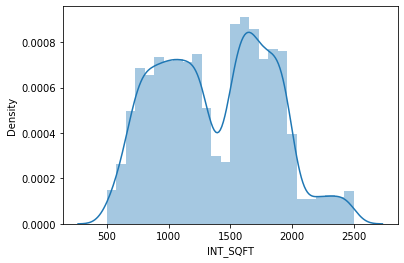

In [128]:
sns.distplot(data.INT_SQFT)


Observation: There is no effective skew

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


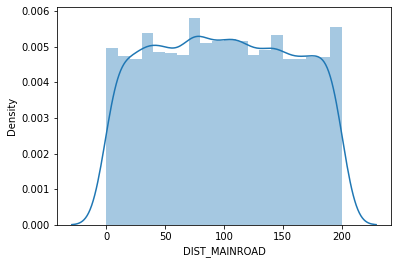

In [129]:
sns.distplot(data.DIST_MAINROAD)

**Observation:** 

Uniform Distribution ( The distance from the main road is uniform)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


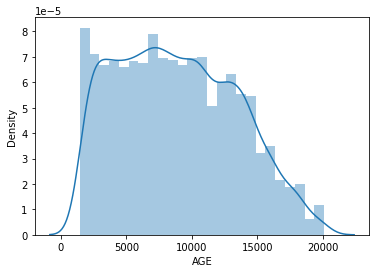

In [130]:
sns.distplot(data.AGE)

In [131]:
#SALE_COND
import plotly.express as px
value = data["SALE_COND"].value_counts()
labels = data["SALE_COND"].unique()
fig=px.pie(data, values=value, names=labels,title="Sales Condition")
fig

**Observation:**

Uniform distribution 

In [132]:
px.histogram(data,x="BUILDTYPE",color="AREA",barmode="group")

In [133]:
px.histogram(data,x="AREA",color="N_ROOM",barmode="group")

Text(0.5, 1.0, 'AREA vs AGE')

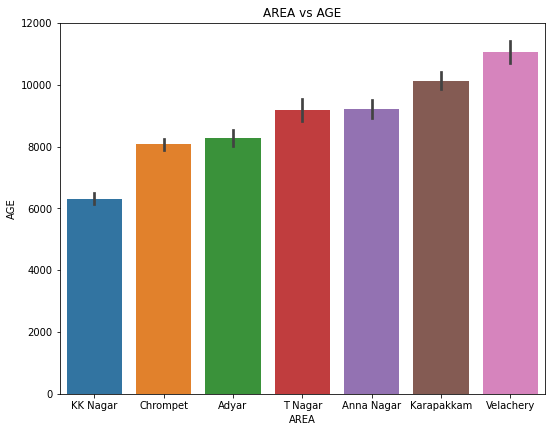

In [134]:
plt.figure(figsize=(40,15))
plt.subplot(241)
sns.barplot(x=data.AREA,y=data.AGE,order=data.groupby('AREA')['AGE'].mean().reset_index().sort_values('AGE')['AREA'])
plt.title('AREA vs AGE')

**Observation**
1. In Velachery area more aged buildings are present

**Feature vs Target**

Text(0.5, 1.0, 'AGE vs SALES_PRICE')

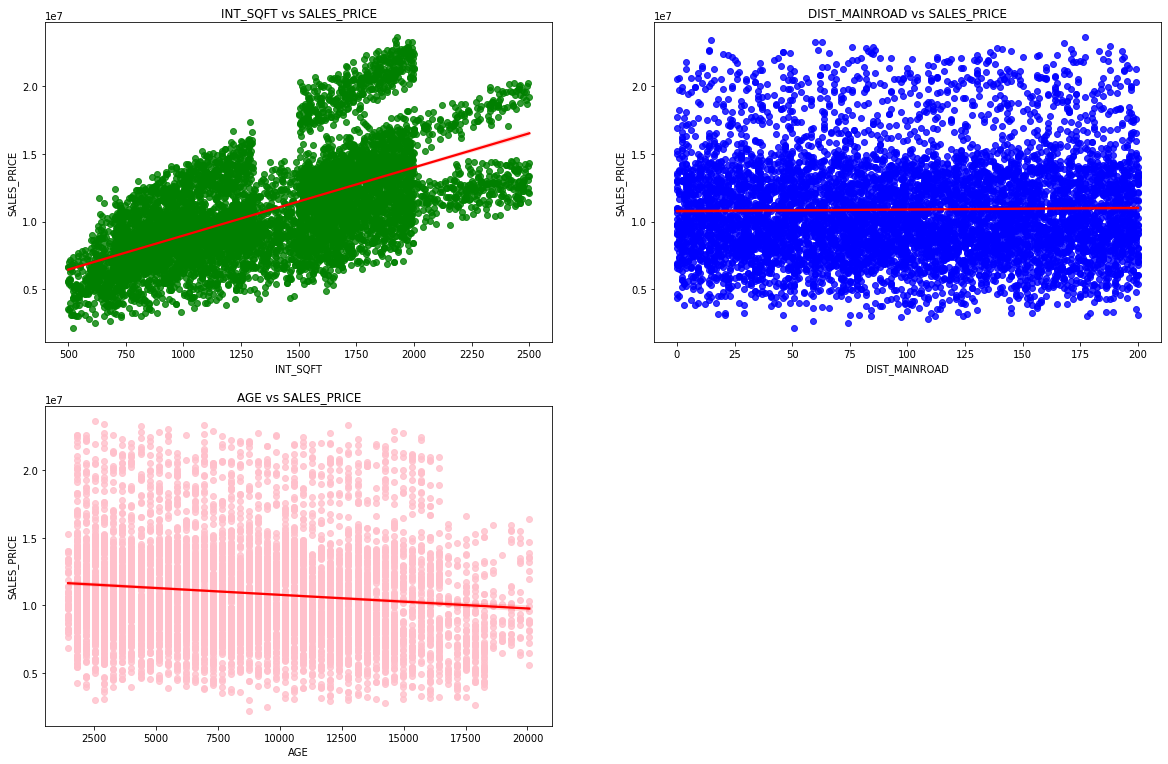

In [135]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x=data["INT_SQFT"],y = data["SALES_PRICE"],scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title("INT_SQFT vs SALES_PRICE")

plt.subplot(322)
sns.regplot(x=data["DIST_MAINROAD"],y = data["SALES_PRICE"],scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title("DIST_MAINROAD vs SALES_PRICE")

plt.subplot(323)
sns.regplot(x=data["AGE"],y = data["SALES_PRICE"],scatter_kws={'color':'pink'},line_kws={'color':'red'})
plt.title("AGE vs SALES_PRICE")

**Observation:**

INT_SQFT vs SALES_PRICE
1. There is a linear relationship b/w sqft and sales price
2. If sqft increases sales price is increasing
3. No transformation or encoding required

DIST_MAINROAD vs SALES_PRICE
1. There is no relationship between DIST_MAINROAD and SALES_PRICE
2. So we can drop DIST_MAINROAD feature

Age vs SALES_PRICE
1. There is very slight liner relationship between Age and sales_price
2. No encoding or transformation required.

Text(0.5, 1.0, 'QS_OVERALL vs SALES_PRICE')

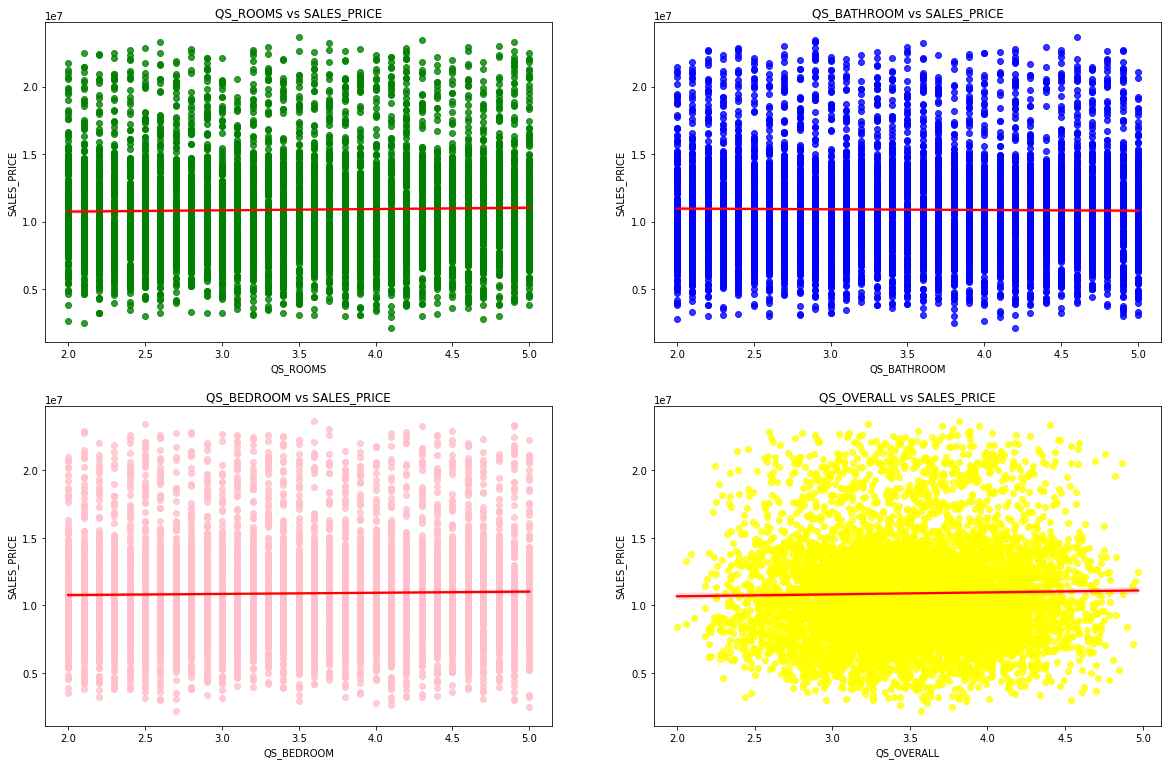

In [136]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x=data["QS_ROOMS"],y = data["SALES_PRICE"],scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title("QS_ROOMS vs SALES_PRICE")

plt.subplot(322)
sns.regplot(x=data["QS_BATHROOM"],y = data["SALES_PRICE"],scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title("QS_BATHROOM vs SALES_PRICE")

plt.subplot(323)
sns.regplot(x=data["QS_BEDROOM"],y = data["SALES_PRICE"],scatter_kws={'color':'pink'},line_kws={'color':'red'})
plt.title("QS_BEDROOM vs SALES_PRICE")

plt.subplot(324)
sns.regplot(x=data["QS_OVERALL"],y = data["SALES_PRICE"],scatter_kws={'color':'yellow'},line_kws={'color':'red'})
plt.title("QS_OVERALL vs SALES_PRICE")

**Observation:**

There is no relationship b/w above 4 features and target, so we can drop all 4 features.


Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

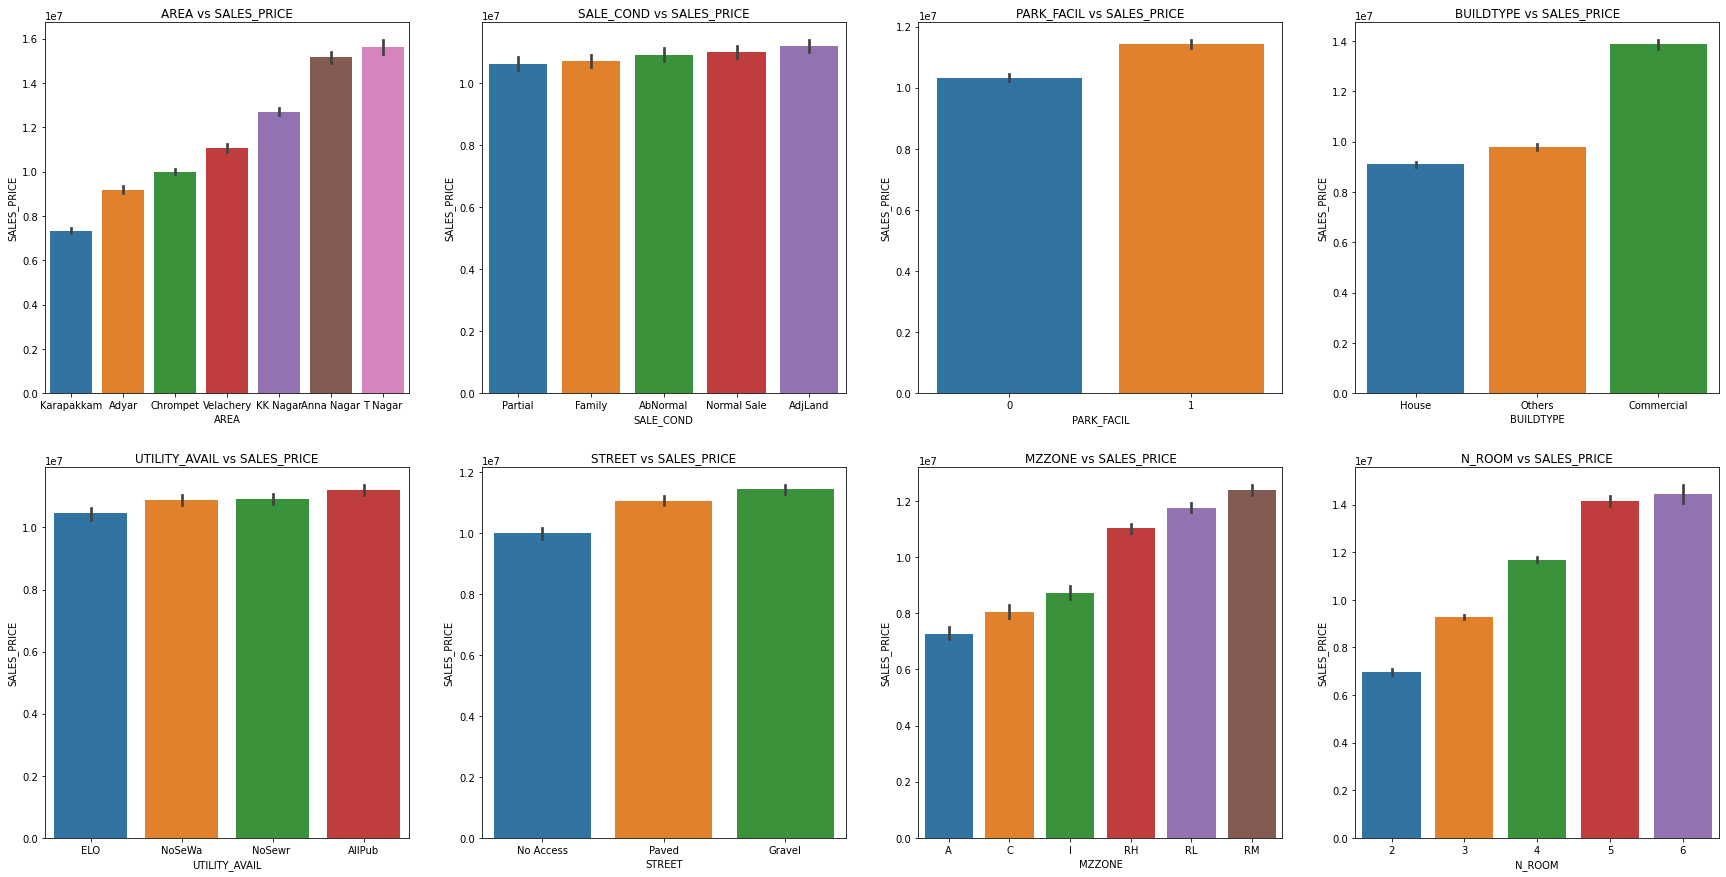

In [137]:
plt.figure(figsize=(30,15))
plt.subplot(241)
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

plt.subplot(242)
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

plt.subplot(243)
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

plt.subplot(244)
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

plt.subplot(245)
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')

plt.subplot(246)
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

plt.subplot(247)
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

plt.subplot(248)
sns.barplot(x=data.N_ROOM,y=data.SALES_PRICE,order=data.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

**Observation:**

AREA vs SALE_PRICE

1. Area changing sales price also changing
2. There is ordinal linear relationship b/w Area and sales price
3. We have to do label encoding here

Sale_cond vs SALE_PRICE

1. There is slight linear relationship
2. We have to do label encoding.

PARK_FACIL vs SALES_PRICE

1. Label encoding

BUILDTYPE vs SALES_PRICE
1. There is no linear relationship
2. so we can do one hot encoding

UTILITY_AVAIL vs SALES_PRICE

1. Linear relation ship
2. Label encoding

STREET vs SALES_PRICE

1. Linear relation ship
2. Label encoding

MZZONE vs SALES_PRICE

1. Linear relation ship
2. Label encoding

N_ROOM vs SALES_PRICE

1. Linear relation ship

**ENCODING**

In [138]:
del data['PRT_ID']
del data['QS_ROOMS']
del data['QS_BATHROOM']
del data['QS_BEDROOM']
del data['QS_OVERALL']
del data['REG_FEE']
del data['COMMIS']
del data['DIST_MAINROAD']
del data['DATE_SALE']
del data['DATE_BUILD']

we don't consider COMMIS, REG_FEE, PRT_ID as features so deleting those columns



In [139]:
data.AREA=data.AREA.map({"Karapakkam":0,"Adyar":1,"Chrompet":2,"Velachery":3,"KK Nagar":4,"Anna Nagar":5,"T Nagar":6})

In [140]:
data.SALE_COND=data.SALE_COND.map({"Partial":0,"Family":1,"AbNormal":2,"Normal Sale":3,"AdjLand":4})

In [141]:
data=pd.get_dummies(data,columns=['BUILDTYPE'])

In [142]:
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].map({"ELO":0,"NoSeWa":1,"NoSewr ":2,"AllPub":3})

In [143]:
data.STREET=data.STREET.map({"No Access":0,"Paved":1,"Gravel":2})

In [144]:
data.MZZONE=data.MZZONE.map({"A":0,"C":1,"I":2,"RH":3,"RL":4,"RM":5})

In [145]:
data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,2,1,3,1,0,7600000,16060,1,0,0
1,5,1986,2,1,5,2,0,3,2,3,21717770,4015,1,0,0
2,1,909,1,1,3,2,1,0,2,4,13159200,7300,1,0,0
3,3,1855,3,2,5,1,0,2,1,2,9630290,8030,0,0,1
4,0,1226,1,1,3,2,1,3,2,1,7406250,10950,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,4,0,0,0,5,5353000,17885,0,0,1
7105,3,1897,3,2,5,1,1,1,0,3,10818480,3285,0,0,1
7106,3,1614,2,1,4,3,0,1,2,2,8351410,10220,0,1,0
7107,0,787,1,1,2,0,1,0,1,4,8507000,11680,1,0,0


In [146]:
data=data.reindex(columns=['AREA','INT_SQFT','AGE','N_BEDROOM','N_BATHROOM',"N_ROOM",'SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','SALES_PRICE'])

In [147]:
data

,AREA,INT_SQFT,AGE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,SALES_PRICE
0,0,1004,16060,1,1,3,2,1,3,1,0,1,0,0,7600000
1,5,1986,4015,2,1,5,2,0,3,2,3,1,0,0,21717770
2,1,909,7300,1,1,3,2,1,0,2,4,1,0,0,13159200
3,3,1855,8030,3,2,5,1,0,2,1,2,0,0,1,9630290
4,0,1226,10950,1,1,3,2,1,3,2,1,0,0,1,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,17885,1,1,2,4,0,0,0,5,0,0,1,5353000
7105,3,1897,3285,3,2,5,1,1,1,0,3,0,0,1,10818480
7106,3,1614,10220,2,1,4,3,0,1,2,2,0,1,0,8351410
7107,0,787,11680,1,1,2,0,1,0,1,4,1,0,0,8507000


Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


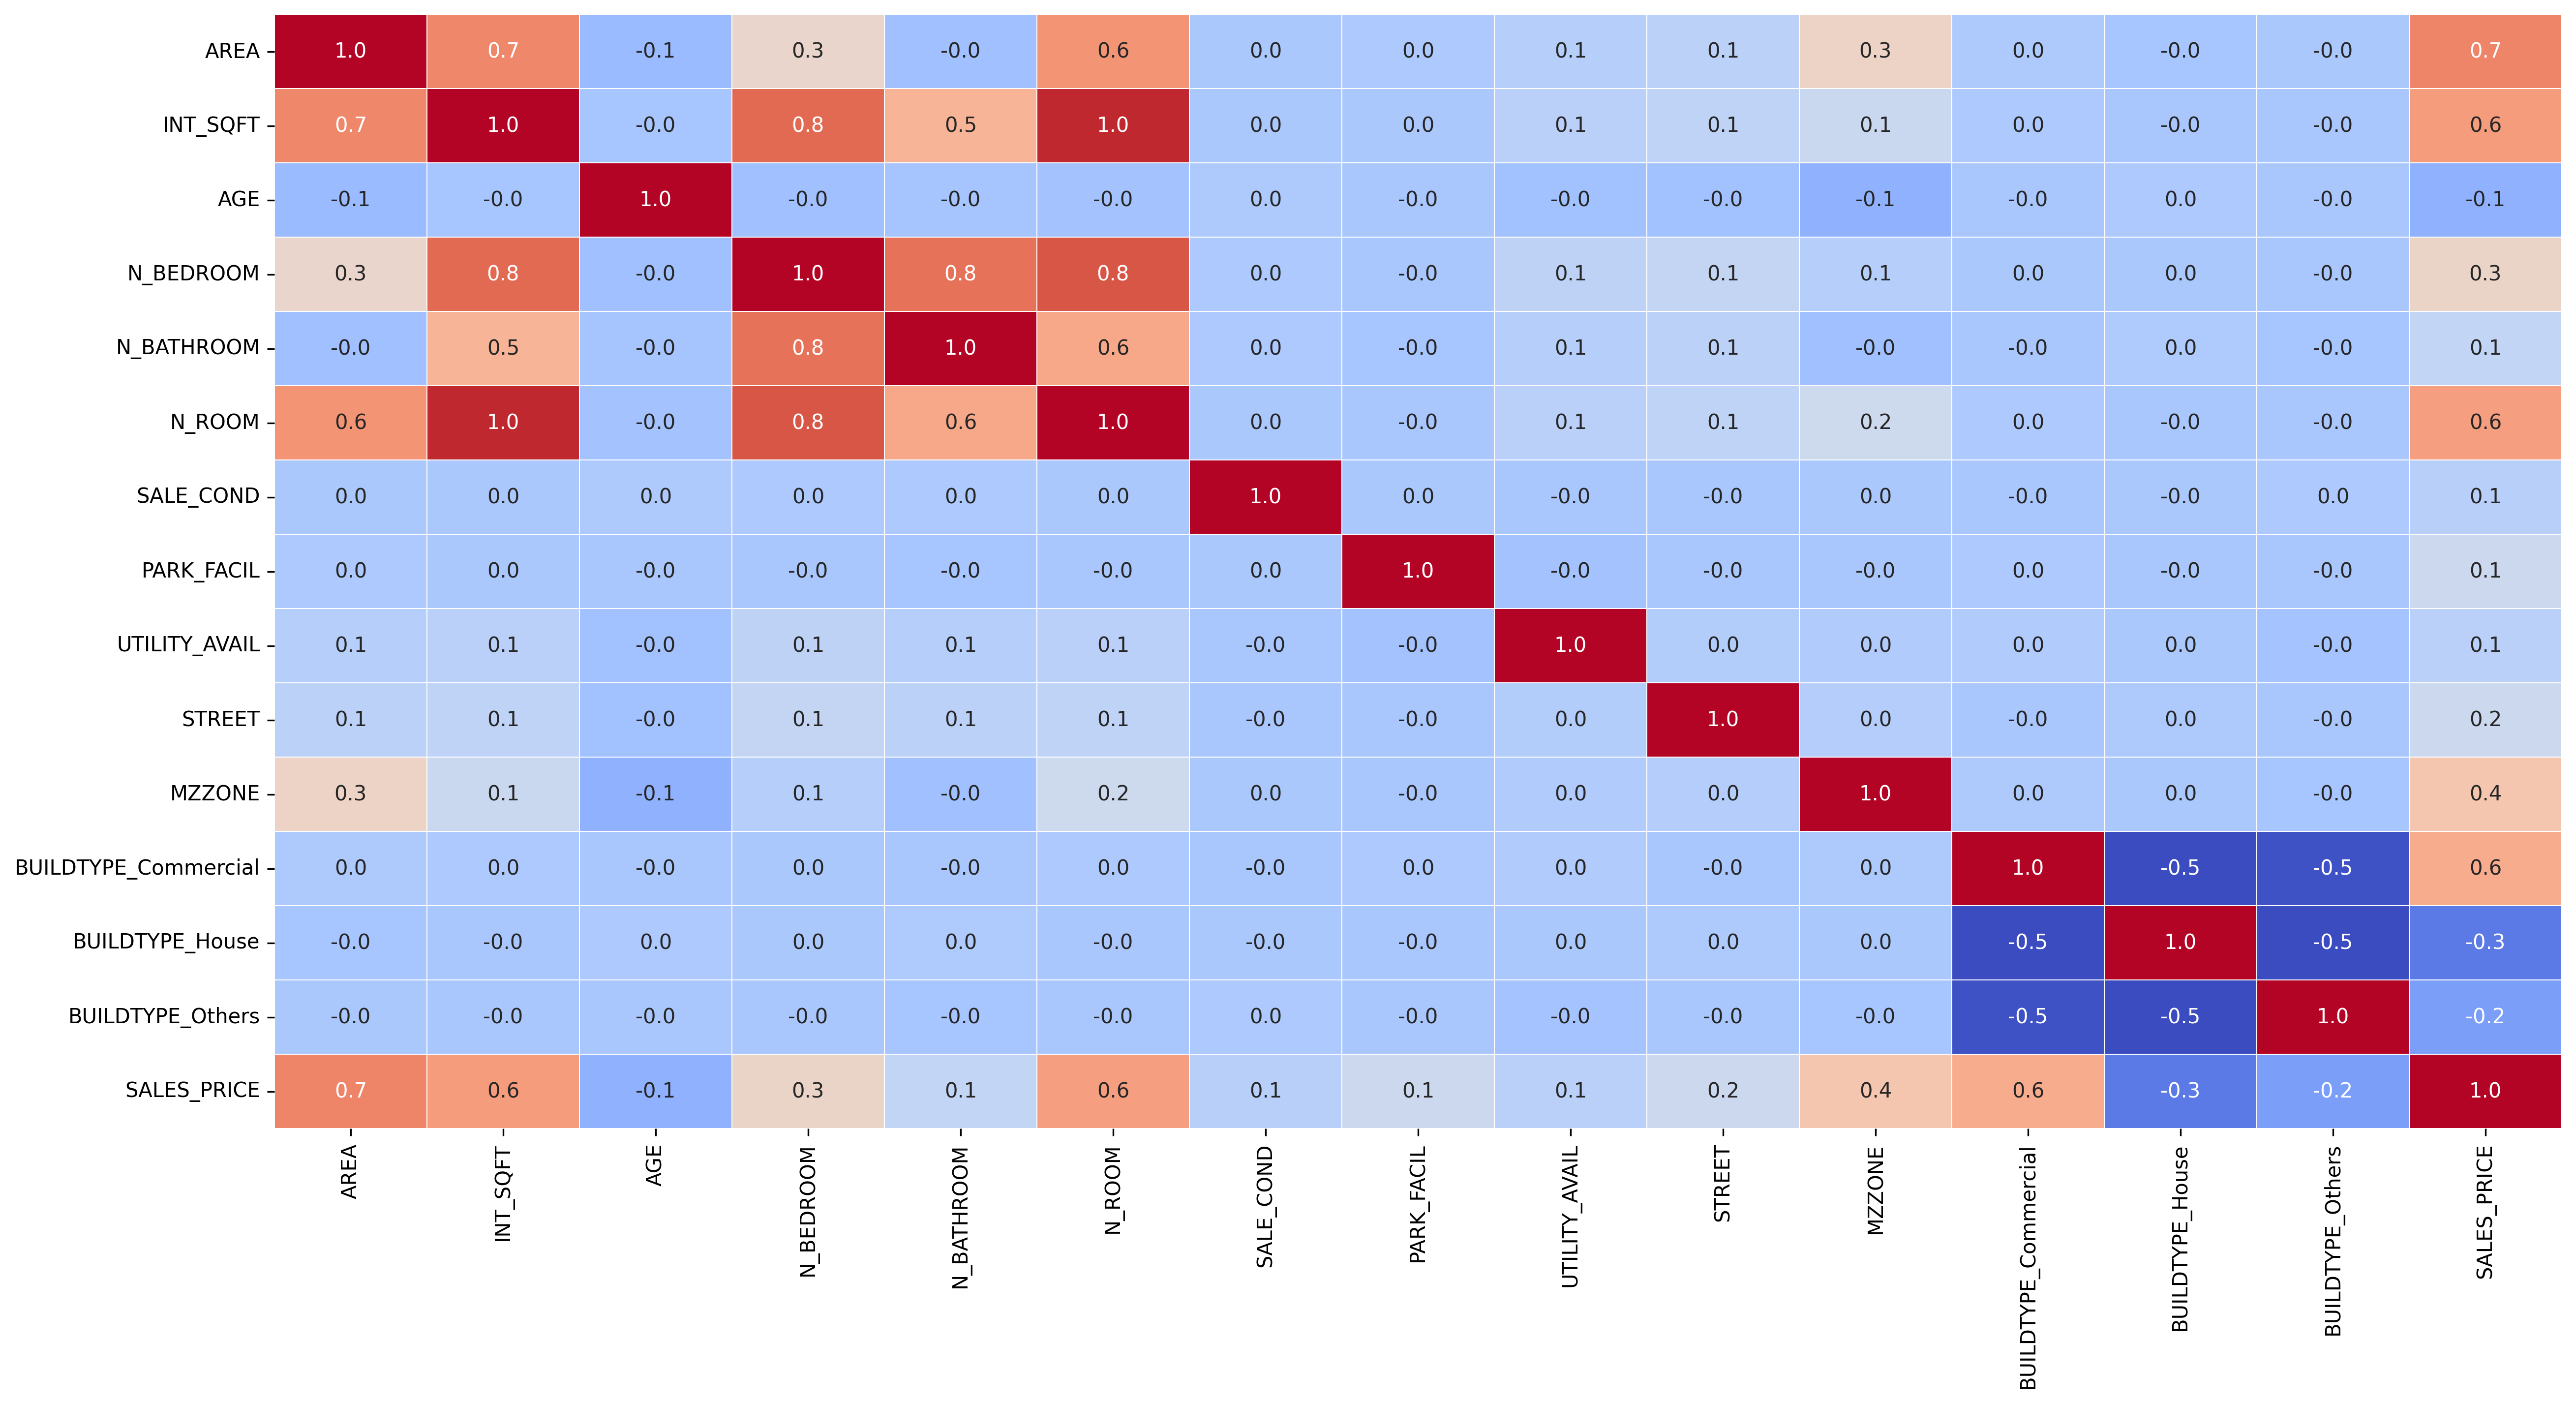

In [148]:
%pylab
from pylab import *
plt.figure(figsize(20,10),dpi=300)
sns.heatmap(data.corr(method='pearson'),cbar=False,annot=True,fmt='.1f',linewidth=0.2,cmap='coolwarm');

**Scaling**

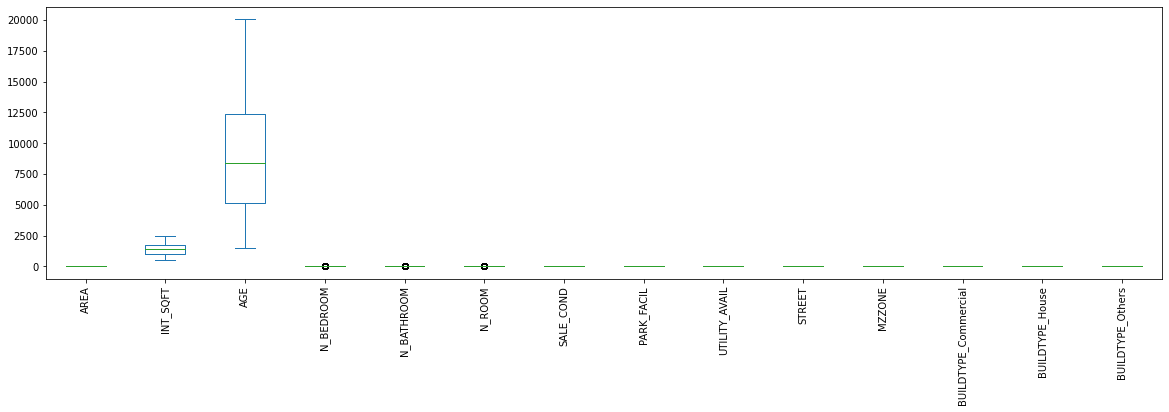

In [149]:
X = data.iloc[:, :-1]
y = data['SALES_PRICE'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7)
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5),rot=90)
plt.show()

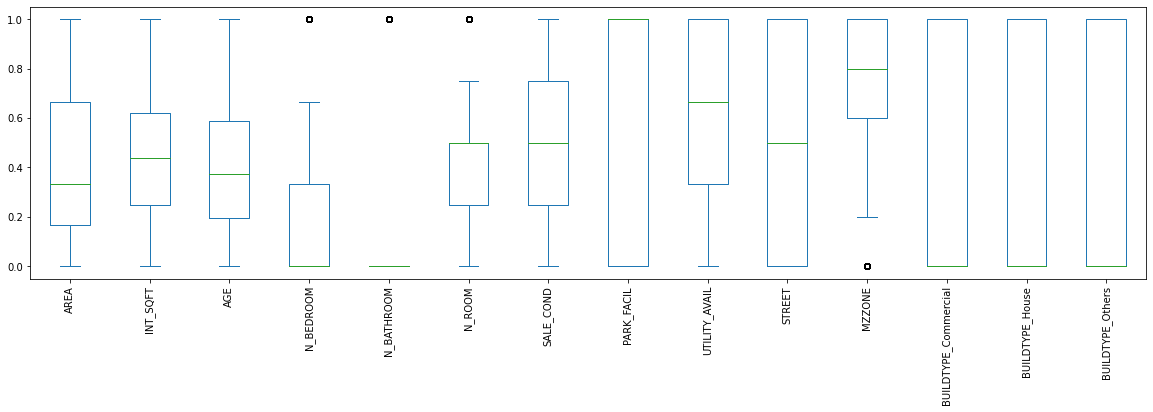

In [150]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler().fit(X_train)
X_train_mm=mm.transform(X_train)
X_train_mm=pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm=mm.transform(X_test)
X_test_mm=pd.DataFrame(X_test_mm, columns=X_train.columns)
X_train_mm.plot.box(figsize=(20,5),rot=90)
plt.show()

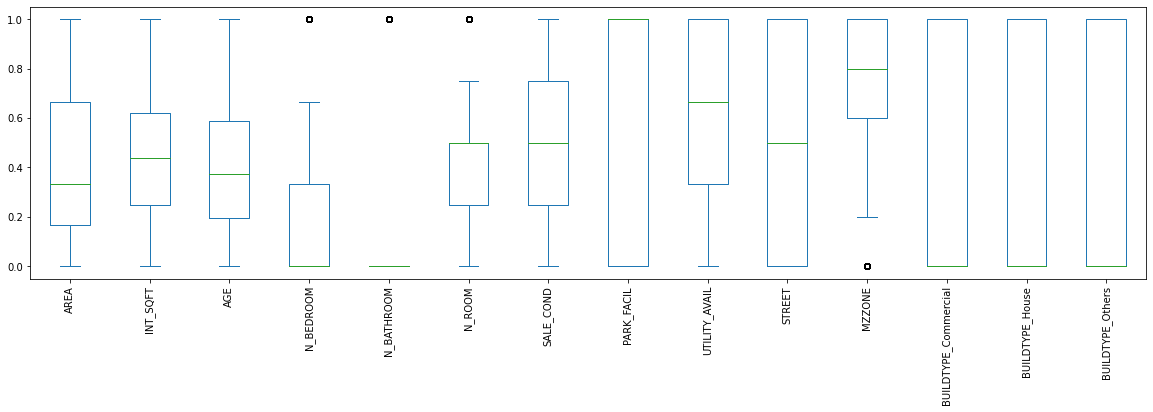

In [151]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler().fit(X_train)
X_train_mm=mm.transform(X_train)
X_train_mm=pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm=mm.transform(X_test)
X_test_mm=pd.DataFrame(X_test_mm, columns=X_train.columns)
X_train_mm.plot.box(figsize=(20,5),rot=90)
plt.show()

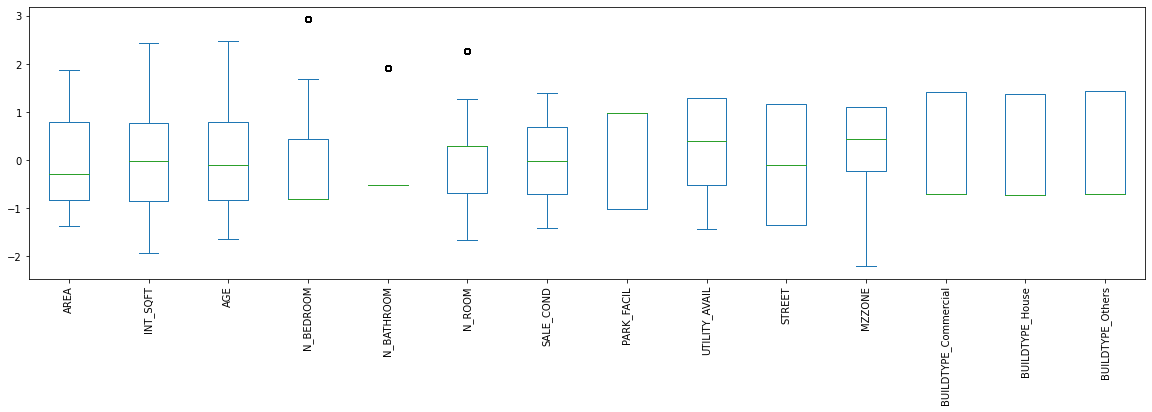

In [152]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(X_train)
X_train_ss=ss.transform(X_train)
X_train_ss=pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss=ss.transform(X_test)
X_test_ss=pd.DataFrame(X_test_ss, columns=X_train.columns)
X_train_ss.plot.box(figsize=(20,5),rot=90)
plt.show()

**Linear Regression Model**

In [153]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
LR = LinearRegression()
LR.fit(X_train, y_train)
y_predict_LR=LR.predict(X_test)
print('R-Square value of Linear Regression model:',metrics.r2_score(y_test,y_predict_LR))

#LR using MinMax Scaler
LR_mm = LinearRegression()
LR_mm.fit(X_train_mm, y_train)
y_predict_LR_mm=LR_mm.predict(X_test_mm)
print('R-Square value of Linear Regression model after MinMax Scaler:',metrics.r2_score(y_test,y_predict_LR_mm))

#LR using Standard Scaler
LR_ss = LinearRegression()
LR_ss.fit(X_train_ss, y_train)
y_predict_LR_ss=LR_ss.predict(X_test_ss)
print('R-Square value of Linear Regression model after Standard Scaler:',metrics.r2_score(y_test,y_predict_LR_ss))

R-Square value of Linear Regression model: 0.923426306224015
R-Square value of Linear Regression model after MinMax Scaler: 0.9231896182439306
R-Square value of Linear Regression model after Standard Scaler: 0.9234263062240153


In [154]:
print(LR.intercept_)
print(LR_mm.intercept_)
print(LR_ss.intercept_)

378498.3564004693
-7.405291956688522e+19
10918113.077604536


In [155]:
print(LR.coef_)

[ 5.67183913e+05  1.41279050e+03 -4.92174463e+01 -1.57609402e+06
  2.52311405e+05  1.75893885e+06  1.57779149e+05  1.01687839e+06
  5.10585498e+04  4.99930457e+05  5.80445615e+05  2.88966763e+06
 -1.77602755e+06 -1.11364008e+06]


In [156]:
coeff_df = pd.DataFrame(LR.coef_,['AREA','INT_SQFT','AGE','N_BEDROOM','N_BATHROOM',"N_ROOM",'SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others'], columns=['Coefficient'])
print(coeff_df)

                       Coefficient
AREA                  5.671839e+05
INT_SQFT              1.412791e+03
AGE                  -4.921745e+01
N_BEDROOM            -1.576094e+06
N_BATHROOM            2.523114e+05
N_ROOM                1.758939e+06
SALE_COND             1.577791e+05
PARK_FACIL            1.016878e+06
UTILITY_AVAIL         5.105855e+04
STREET                4.999305e+05
MZZONE                5.804456e+05
BUILDTYPE_Commercial  2.889668e+06
BUILDTYPE_House      -1.776028e+06
BUILDTYPE_Others     -1.113640e+06


**Observation:**
1. Here as per above coefficient values MZZONE is the first main important fetaure then AREA then UTILITY_AVAIL 5.105855e+04 and then STREET and so on..

In [157]:
#Coeff we got when we used MinMax Scaler
coeff_df = pd.DataFrame(LR_mm.coef_,['AREA','INT_SQFT','AGE','N_BEDROOM','N_BATHROOM',"N_ROOM",'SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others'], columns=['Coefficient'])
print(coeff_df)

                       Coefficient
AREA                  3.372801e+06
INT_SQFT              2.886656e+06
AGE                  -9.258712e+05
N_BEDROOM            -4.731313e+06
N_BATHROOM            2.478321e+05
N_ROOM                6.996720e+06
SALE_COND             6.126762e+05
PARK_FACIL            1.030031e+06
UTILITY_AVAIL         1.885992e+05
STREET                9.873781e+05
MZZONE                2.895659e+06
BUILDTYPE_Commercial  7.405292e+19
BUILDTYPE_House       7.405292e+19
BUILDTYPE_Others      7.405292e+19


**Observation:**

Here as per above coefficient values STREET is the main important feature then Area

In [158]:
#Coeff we got when we used Standard Scaler
coeff_df = pd.DataFrame(LR_ss.coef_,['AREA','INT_SQFT','AGE','N_BEDROOM','N_BATHROOM',"N_ROOM",'SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others'], columns=['Coefficient'])
print(coeff_df)

                       Coefficient
AREA                  1.048299e+06
INT_SQFT              6.448810e+05
AGE                  -2.219831e+05
N_BEDROOM            -1.266201e+06
N_BATHROOM            1.036099e+05
N_ROOM                1.786000e+06
SALE_COND             2.244180e+05
PARK_FACIL            5.084251e+05
UTILITY_AVAIL         5.587339e+04
STREET                3.968647e+05
MZZONE                8.741661e+05
BUILDTYPE_Commercial  1.363543e+06
BUILDTYPE_House      -8.398768e+05
BUILDTYPE_Others     -5.171249e+05


**Observation:**

Here as per above coefficeient values MZZone is the mail important feature then BUILDTYPE_House

In [159]:
# To see the difference between Actual and Predicted values for LR model with out scaling
from pandas import Series;  from numpy.random import randn
from numpy.matlib import randn
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_LR})
print(df)

        Actual     Predicted
0      8155200  8.332858e+06
1     12419450  1.330524e+07
2      7824540  8.282439e+06
3     11513500  1.177419e+07
4     19512010  1.714226e+07
...        ...           ...
1407  12316650  1.218436e+07
1408   3947250  2.823060e+06
1409  11113950  1.050544e+07
1410  12866800  1.300079e+07
1411   8987700  7.677391e+06

[1412 rows x 2 columns]


In [160]:
print(min(y_predict_LR))
print(max(y_predict_LR))

1536131.797215996
20121516.93658986


**Observation:**

The forcaste range of sales price is 1536131 to 20121516

In [161]:
# To see the difference between Actual and Predicted values for LR model using MinMax Scaler
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_LR_mm})
print(df)

        Actual   Predicted
0      8155200   8339456.0
1     12419450  13271040.0
2      7824540   8306688.0
3     11513500  11780096.0
4     19512010  17154048.0
...        ...         ...
1407  12316650  12189696.0
1408   3947250   2867200.0
1409  11113950  10534912.0
1410  12866800  12959744.0
1411   8987700   7700480.0

[1412 rows x 2 columns]


In [162]:
print(min(y_predict_LR_mm))
print(max(y_predict_LR_mm))

1556480.0
20086784.0


**Observation:**

The forcaste range of sales price is 1556480 to 20086784

In [163]:
# To see the difference between Actual and Predicted values for LR model using Standard Scaler
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_LR_ss})
print(df)

        Actual     Predicted
0      8155200  8.332858e+06
1     12419450  1.330524e+07
2      7824540  8.282439e+06
3     11513500  1.177419e+07
4     19512010  1.714226e+07
...        ...           ...
1407  12316650  1.218436e+07
1408   3947250  2.823060e+06
1409  11113950  1.050544e+07
1410  12866800  1.300079e+07
1411   8987700  7.677391e+06

[1412 rows x 2 columns]


In [164]:
print(min(y_predict_LR_ss))
print(max(y_predict_LR_ss))

1536131.7972160876
20121516.936589815


**Observation:**

The forcaste range of sales price is 1536131 to 20121516

**Decision Tree Model**

In [165]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.predict(X_test)

array([ 8149800., 11597050.,  8133770., ..., 10445600., 12807300.,
        9632875.])

In [166]:
from sklearn.metrics import  r2_score
y_predict_dt = dt.predict(X_test)
rsquared = r2_score(y_test,y_predict_dt)
print('R-Square value of Decision Tree model:',metrics.r2_score(y_test,y_predict_dt))

R-Square value of Decision Tree model: 0.9755212611086331


In [167]:
importance = dt.feature_importances_
list(zip(importance,X_test.columns))

[(0.47615173953842643, 'AREA'),
 (0.10341652155223378, 'INT_SQFT'),
 (0.004909216747879171, 'AGE'),
 (0.0006479336514202297, 'N_BEDROOM'),
 (0.0005547176040348594, 'N_BATHROOM'),
 (0.01240449127601995, 'N_ROOM'),
 (0.002601785841240435, 'SALE_COND'),
 (0.015217897726799993, 'PARK_FACIL'),
 (0.0014942885110908015, 'UTILITY_AVAIL'),
 (0.011390772179720728, 'STREET'),
 (0.039386015909557065, 'MZZONE'),
 (0.3267607336214792, 'BUILDTYPE_Commercial'),
 (0.003831057848523761, 'BUILDTYPE_House'),
 (0.001232827991573634, 'BUILDTYPE_Others')]

In [168]:
print(min(y_predict_dt))
print(max(y_predict_dt))

3090250.0
23013500.0


**Observation:**

Here as per above findings AREA is the main important feature if we use Decision Tree model then BUILDTYPE_Commercial then INT_SQFT

The forcaste range of sales price as per Decision Tree model is 22778410 to 20121516

**XG BOOST Model**

In [169]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.12,0.14,0.15,0.2,0.5,0.6,0.65,0.7,0.71,0.72,0.73,0.74,0.75,0.8,0.9,1]:
  model=xgb.XGBRegressor(learning_rate=lr,n_estimators=100,verbosity=0)
  model.fit(X_train, y_train)
  print("Learning rate:", lr, "Train Score:", model.score(X_train, y_train),"cross_val_score:",model.score(X_test, y_test) )

Learning rate: 0.01 Train Score: -0.3868999986145716 cross_val_score: -0.3359520373678
Learning rate: 0.02 Train Score: 0.745179200010512 cross_val_score: 0.7592455834418139
Learning rate: 0.03 Train Score: 0.9242012040835325 cross_val_score: 0.9282511003974533
Learning rate: 0.04 Train Score: 0.9618013534964209 cross_val_score: 0.9628740526185696
Learning rate: 0.05 Train Score: 0.9741735013836657 cross_val_score: 0.9742855211895369
Learning rate: 0.1 Train Score: 0.9918172784288006 cross_val_score: 0.990917319491055
Learning rate: 0.12 Train Score: 0.9942266441105342 cross_val_score: 0.9933735059981919
Learning rate: 0.14 Train Score: 0.9953315519320752 cross_val_score: 0.9944045938636572
Learning rate: 0.15 Train Score: 0.9956920938918619 cross_val_score: 0.9947605535748337
Learning rate: 0.2 Train Score: 0.9966538104722497 cross_val_score: 0.996074126175537
Learning rate: 0.5 Train Score: 0.997703384818671 cross_val_score: 0.996910689900937
Learning rate: 0.6 Train Score: 0.9975504

In [170]:
xg=xgb.XGBRegressor(learning_rate=0.72,n_estimators=100,verbosity=0)
xg.fit(X_train, y_train)

XGBRegressor(learning_rate=0.72, verbosity=0)

In [171]:
y_predict_xg = xg.predict(X_test)
xgrsquared = r2_score(y_test,y_predict_xg)
print('R-Square value of XG Boost model:',metrics.r2_score(y_test,y_predict_xg))
print("Learning rate:", lr, "Train Score:", model.score(X_train, y_train),"cross_val_score:",model.score(X_test, y_test) )

R-Square value of XG Boost model: 0.997667115313143
Learning rate: 1 Train Score: 0.9977587243048448 cross_val_score: 0.9964270074562456


In [172]:
importances = list(xg.feature_importances_)

# List of tuples with variable and importance
original_feature_list = list(data.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BUILDTYPE_Commercial Importance: 0.4300000071525574
Variable: AREA                 Importance: 0.3499999940395355
Variable: PARK_FACIL           Importance: 0.10000000149011612
Variable: INT_SQFT             Importance: 0.029999999329447746
Variable: MZZONE               Importance: 0.029999999329447746
Variable: N_ROOM               Importance: 0.019999999552965164
Variable: STREET               Importance: 0.019999999552965164
Variable: N_BEDROOM            Importance: 0.009999999776482582
Variable: N_BATHROOM           Importance: 0.009999999776482582
Variable: BUILDTYPE_House      Importance: 0.009999999776482582
Variable: AGE                  Importance: 0.0
Variable: SALE_COND            Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: BUILDTYPE_Others     Importance: 0.0


In [173]:
print(min(y_predict_xg))
print(max(y_predict_xg))

2642793.8
22736636.0


**Observation:**

Here as per above XG Boost Model observation BUILDTYPE_Commercial is the first most important feature then AREA then PARK_FACIL and then INT_SQFT..

The forcaste range of sales price as per XG Boost model is 2642793 to 22736636

**Random Forest**

In [174]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, max_depth=16, max_features='sqrt')
rf.fit(X_train, y_train)
rf.predict(X_test)
from sklearn.metrics import  r2_score
y_predict_rf = rf.predict(X_test)
print('R-Square value of Randome Forest model:',metrics.r2_score(y_test,y_predict_rf))

R-Square value of Randome Forest model: 0.9870166526566828


In [175]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
original_feature_list = list(data.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: BUILDTYPE_Commercial Importance: 0.22
Variable: AREA                 Importance: 0.2
Variable: INT_SQFT             Importance: 0.16
Variable: N_ROOM               Importance: 0.12
Variable: MZZONE               Importance: 0.08
Variable: BUILDTYPE_House      Importance: 0.06
Variable: N_BEDROOM            Importance: 0.04
Variable: BUILDTYPE_Others     Importance: 0.04
Variable: AGE                  Importance: 0.02
Variable: N_BATHROOM           Importance: 0.01
Variable: SALE_COND            Importance: 0.01
Variable: PARK_FACIL           Importance: 0.01
Variable: UTILITY_AVAIL        Importance: 0.01
Variable: STREET               Importance: 0.01


In [176]:
print(min(y_predict_rf))
print(max(y_predict_rf))

3605089.8214285714
22271093.34285714


**Observation:**

Here as per above importance values AREA is the first main important feature then BUILDTYPE_Commercial then INT_SQFT.

The forcaste range of sales price as per Random Forest model is 3612636 to 22340417

**KNN Model**

In [177]:
#finding n_neighbour before scaling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
params={'n_neighbors' :[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model=GridSearchCV(knn,params,cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 9}

In [178]:
#finding n_neighbour after scaled the data using MinMax Scaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
params={'n_neighbors' :[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model=GridSearchCV(knn,params,cv=5)
model.fit(X_train_mm, y_train)
model.best_params_

{'n_neighbors': 4}

In [179]:
#finding n_neighbour after scaled the data using Standard Scaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
params={'n_neighbors' :[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model=GridSearchCV(knn,params,cv=5)
model.fit(X_train_ss, y_train)
model.best_params_

{'n_neighbors': 6}

In [180]:
# Find R-Square value before scaled the data 
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
print('R-Square value of KNN model without Scaling:',metrics.r2_score(y_test,y_predict_knn))

# Find R-Square value after scaled the data using MinMax Scaler
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_mm, y_train)
y_predict_knn_mm = knn.predict(X_test_mm)
print('R-Square value of KNN model using MinMax Scaler:',metrics.r2_score(y_test,y_predict_knn_mm))

# Find R-Square value after scaled the data using Standard Scaler
knn=KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train_ss, y_train)
y_predict_knn_ss = knn.predict(X_test_ss)
print('R-Square value of KNN model using Standard Scaler:',metrics.r2_score(y_test,y_predict_knn_ss))

R-Square value of KNN model without Scaling: 0.40570170691856033
R-Square value of KNN model using MinMax Scaler: 0.9325746009450417
R-Square value of KNN model using Standard Scaler: 0.9523088013041742


In [181]:
print(min(y_predict_knn))
print(max(y_predict_knn))

4889250.0
18051862.222222224


In [182]:
print(min(y_predict_knn_mm))
print(max(y_predict_knn_mm))

3189500.0
22396817.5


In [183]:
print(min(y_predict_knn_ss))
print(max(y_predict_knn_ss))

3401750.0
22376703.333333332


**Observation:**

KNN Model using Standard Scaler gives best R-Square value

The forcaste range of sales price as per KNN model is 3401750 to 22376703

**Over all Observation:**
1. In all the 5 models above XG BOOST is the best model as per R-Square value as it has value of 0.997667115313143.
2. AREA, INT_SQFT, Build_commercial, STREET, Build_House, MZZone, PARK_FACIL are the most important features
3. The best forcaste range of sales price is 2642793 to 22736636